# Brain Tumors

### Instalacion de Librerias

In [38]:
%pip install kaggle
%pip install opencv-python
%pip install numpy matplotlib opencv-python tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1. Introducción

La presencia de tumores malignos en el cerebro, especialmente el glioblastoma, representa una amenaza para la vida del paciente. Esta forma de cáncer cerebral no solo es la más común en adultos, sino también la de peor pronóstico, con una supervivencia media inferior a un año. Un factor determinante en el pronóstico y la respuesta a la quimioterapia es la metilación del promotor MGMT, una secuencia genética específica presente en el tumor.

En la actualidad, el análisis genético del cáncer requiere una intervención quirúrgica para extraer una muestra de tejido, seguido de varias semanas para determinar la caracterización genética del tumor. Dependiendo de estos resultados y del tipo de terapia inicial elegida, puede ser necesario realizar cirugías adicionales. Desarrollar un método preciso para predecir la genética del cáncer a través de imágenes (es decir, radiogenómica) podría reducir el número de cirugías necesarias y perfeccionar el tipo de terapia requerida.

#### Problemática:

La principal problemática radica en la invasividad del procedimiento actual para obtener información genética sobre los tumores cerebrales. La necesidad de intervenciones quirúrgicas para obtener muestras de tejido no solo conlleva riesgos inherentes, sino que también prolonga el tiempo necesario para obtener resultados. Este retraso puede afectar la rapidez con la que se inicia el tratamiento, lo que es crítico en casos de tumores cerebrales agresivos como el glioblastoma.

#### La Tecnología como Solución:

La tecnología de visión artificial emerge como una herramienta revolucionaria en la detección de tumores cerebrales. La capacidad de analizar imágenes médicas de manera precisa y no invasiva ofrece una alternativa prometedora al método convencional. Mediante algoritmos avanzados, la radiogenómica permite identificar características genéticas específicas de los tumores a partir de imágenes médicas, eliminando la necesidad de procedimientos quirúrgicos invasivos.

Al integrar la tecnología de visión artificial en el diagnóstico de tumores cerebrales, no solo se agiliza el proceso, sino que también se potencia la capacidad de personalizar los tratamientos de manera más efectiva. Esta aproximación no solo representa un avance significativo en la eficacia clínica, sino que también abre la puerta a una gestión más precisa y menos invasiva de pacientes con cáncer cerebral. En este contexto, exploramos cómo la aplicación de la visión artificial puede transformar la atención médica, brindando esperanza a aquellos afectados por esta devastadora enfermedad.

### 2. Datos

El dataset tomado para el entrenamieto de datos es de https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

Tamaño del Conjunto de Datos:
    Número total de imágenes: 97 (negative) + 128 (positive) = 225 imágenes.

Proporción de Clases:
    Imágenes sin tumores (negative): 97 imágenes.
    Imágenes con tumores (positive): 128 imágenes.
    Proporción positivos vs negativos: 128:97

Balance de Clases:
    Las clases no están completamente balanceadas debido a la diferencia en el número de imágenes en las carpetas "negative" y "positive".

In [39]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, auc

In [40]:

# Función para cargar y preprocesar las imágenes
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Ajusta el tamaño según sea necesario
        img = img / 255.0  # Normalización
        images.append(img)
        labels.append(label)
    return images, labels

# Cargar imágenes positivas y negativas
positive_images, positive_labels = load_images('/Users/sergiogonzalez/Documents/GitHub/IA-TEC/Julio/Iplementación de un modelo de deep learning/brain_mri_scan_images/positive', 1)
negative_images, negative_labels = load_images('/Users/sergiogonzalez/Documents/GitHub/IA-TEC/Julio/Iplementación de un modelo de deep learning/brain_mri_scan_images/negative', 0)

# Crear conjuntos de datos y etiquetas
X = np.array(positive_images + negative_images)
y = to_categorical(np.array(positive_labels + negative_labels))

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Desarrollo del Modelo

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
3/3 [==============================] - 2s 580ms/step - loss: 1.2630 - accuracy: 0.5580 - val_loss: 0.8210 - val_accuracy: 0.3261
Epoch 2/20
3/3 [==============================] - 2s 519ms/step - loss: 0.6961 - accuracy: 0.6464 - val_loss: 0.6150 - val_accuracy: 0.8261
Epoch 3/20
3/3 [==============================] - 2s 527ms/step - loss: 0.5645 - accuracy: 0.7624 - val_loss: 0.5013 - val_accuracy: 0.7609
Epoch 4/20
3/3 [==============================] - 2s 531ms/step - loss: 0.5778 - accuracy: 0.7182 - val_loss: 0.4954 - val_accuracy: 0.8043
Epoch 5/20
3/3 [==============================] - 2s 540ms/step - loss: 0.5226 - accuracy: 0.7569 - val_loss: 0.4827 - val_accuracy: 0.7609
Epoch 6/20
3/3 [==============================] - 2s 537ms/step - loss: 0.4778 - accuracy: 0.8122 - val_loss: 0.5033 - val_accuracy: 0.8261
Epoch 7/20
3/3 [==============================] - 2s 536ms/step - loss: 0.4801 - accuracy: 0.7845 - val_loss: 0.4595 - val_accuracy: 0.8043
Epoch 8/20
3/3 [====

### 4. Evaluacion del modelo

Las métricas que elegí para evaluar cómo se desempeña el modelo en la detección de tumores cerebrales proporcionan una imagen completa y específica para este problema médico. La precisión general nos da una idea general de cuán preciso es el modelo, mientras que la precisión y la sensibilidad se centran en lo bien que identifica los casos positivos, algo crítico en medicina para evitar perder casos importantes. La matriz de confusión nos muestra más detalles sobre dónde comete errores el modelo, y el área bajo la curva ROC (ROC-AUC) nos dice cómo de bien puede distinguir entre las dos clases. En resumen, estas métricas se han elegido para dar una evaluación completa y contextualizada del rendimiento del modelo en la detección de tumores cerebrales.

In [43]:

def evaluate_model(model, X_test, y_test):
    # Evaluar el modelo en el conjunto de prueba
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Accuracy: {accuracy}')

    # Obtener predicciones del modelo en el conjunto de prueba
    predictions = model.predict(X_test)

    # Convierte las etiquetas one-hot a etiquetas de clase
    true_labels = np.argmax(y_test, axis=1)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calcular métricas adicionales
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    roc_auc = roc_auc_score(true_labels, predictions[:, 1])

    # Imprimir métricas adicionales
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'ROC-AUC Score: {roc_auc:.4f}')

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(true_labels, predictions[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

2/2 [==============================] - 0s 44ms/step - loss: 0.5523 - accuracy: 0.9130
Accuracy: 0.9130434989929199
2/2 [==============================] - 0s 38ms/step
Precision: 0.9655
Recall: 0.9032
Confusion Matrix:
[[14  1]
 [ 3 28]]
ROC-AUC Score: 0.9075


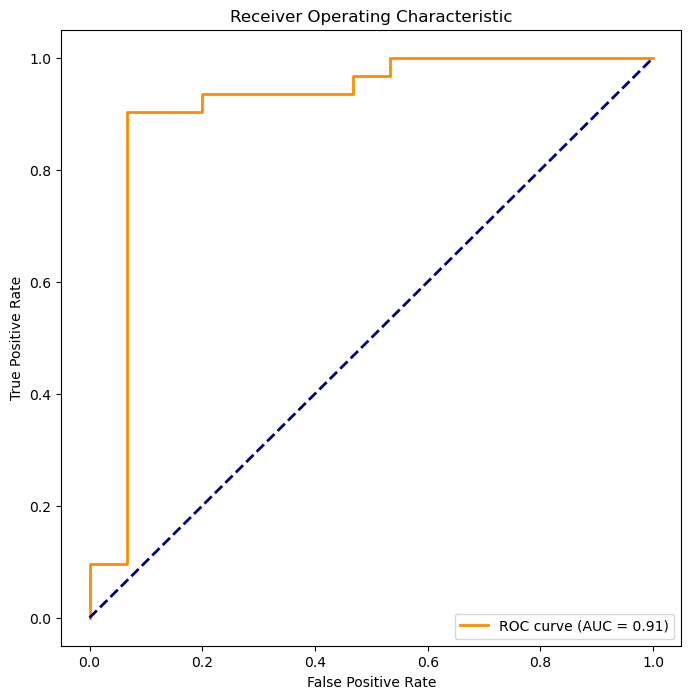

In [44]:
evaluate_model(model, X_test, y_test)

2/2 [==============================] - 0s 37ms/step


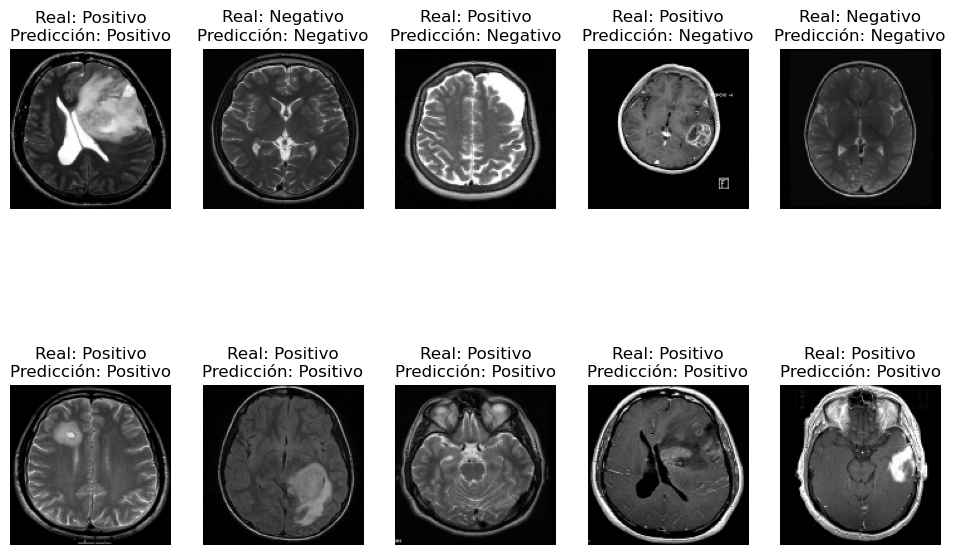

In [45]:
import matplotlib.pyplot as plt

# Obtén predicciones del modelo en el conjunto de prueba
predictions = model.predict(X_test)

# Mapea las clases a etiquetas legibles
class_labels = {0: 'Negativo', 1: 'Positivo'}

# Muestra algunas imágenes con sus predicciones
plt.figure(figsize=(12, 8))
for i in range(10):  # Mostrar las primeras 10 imágenes
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    true_label = class_labels[np.argmax(y_test[i])]
    pred_label = class_labels[np.argmax(predictions[i])]
    plt.title(f'Real: {true_label}\nPredicción: {pred_label}')
    plt.axis('off')

plt.show()


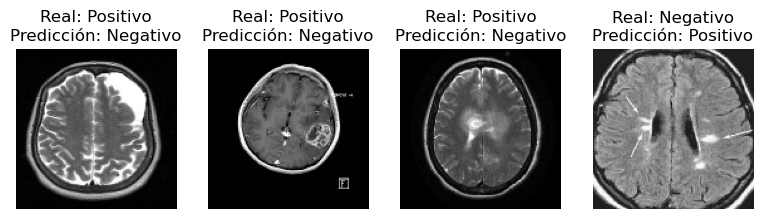

In [46]:
# Obtén índices de las imágenes que fueron clasificadas incorrectamente
incorrect_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

# Muestra algunas imágenes incorrectas con sus predicciones
plt.figure(figsize=(12, 8))
for i, idx in enumerate(incorrect_indices[:10]):  # Mostrar las primeras 10 imágenes incorrectas
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    true_label = class_labels[np.argmax(y_test[idx])]
    pred_label = class_labels[np.argmax(predictions[idx])]
    plt.title(f'Real: {true_label}\nPredicción: {pred_label}')
    plt.axis('off')

plt.show()


In [47]:
# Obtén predicciones del modelo en el conjunto de prueba
predictions = model.predict(X_test)

# Convierte las etiquetas one-hot a etiquetas de clase
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Encuentra los índices de las imágenes clasificadas incorrectamente
incorrect_indices = np.where(true_labels != predicted_labels)[0]

# Número de imágenes clasificadas incorrectamente
num_incorrect = len(incorrect_indices)
print(f'Número de imágenes clasificadas incorrectamente: {num_incorrect}')


2/2 [==============================] - 0s 42ms/step
Número de imágenes clasificadas incorrectamente: 4


### 4. Ajuste de Modelo

#### Aumentar o disminuir la complejidad del modelo

Se ha reducido la complejidad del modelo, disminuyendo el número de capas y neuronas. Esto podría ayudar a manejar mejor conjuntos de datos más pequeños.

Epoch 1/20
6/6 [==============================] - 1s 100ms/step - loss: 1.6380 - accuracy: 0.5138 - val_loss: 0.5238 - val_accuracy: 0.8043
Epoch 2/20
6/6 [==============================] - 1s 89ms/step - loss: 0.5968 - accuracy: 0.7127 - val_loss: 0.5265 - val_accuracy: 0.7609
Epoch 3/20
6/6 [==============================] - 1s 86ms/step - loss: 0.5722 - accuracy: 0.7514 - val_loss: 0.5063 - val_accuracy: 0.7826
Epoch 4/20
6/6 [==============================] - 1s 89ms/step - loss: 0.5008 - accuracy: 0.7845 - val_loss: 0.6082 - val_accuracy: 0.7174
Epoch 5/20
6/6 [==============================] - 1s 89ms/step - loss: 0.4454 - accuracy: 0.8122 - val_loss: 0.4623 - val_accuracy: 0.8043
Epoch 6/20
6/6 [==============================] - 1s 96ms/step - loss: 0.4368 - accuracy: 0.8287 - val_loss: 0.4599 - val_accuracy: 0.8043
Epoch 7/20
6/6 [==============================] - 1s 88ms/step - loss: 0.3843 - accuracy: 0.8343 - val_loss: 0.4402 - val_accuracy: 0.8043
Epoch 8/20
6/6 [==========

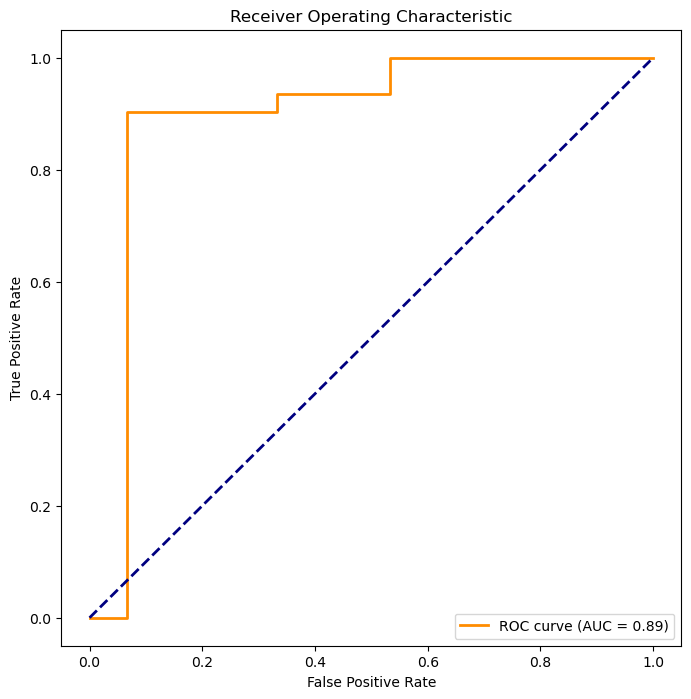

In [55]:
model_complex = Sequential()
model_complex.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_complex.add(MaxPooling2D((2, 2)))
model_complex.add(Conv2D(64, (3, 3), activation='relu'))
model_complex.add(MaxPooling2D((2, 2)))
model_complex.add(Flatten())
model_complex.add(Dense(64, activation='relu'))
model_complex.add(Dropout(0.5))
model_complex.add(Dense(2, activation='softmax'))

# Compilar el modelo
model_complex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_complex.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
evaluate_model(model_complex, X_test, y_test)

#### Ajustar el Tamaño del Kernel y el Tamaño del Pool:

Se ha ajustado el tamaño del kernel y el tamaño del pool para evaluar su impacto en el rendimiento del modelo.

Epoch 1/20
6/6 [==============================] - 1s 164ms/step - loss: 0.8553 - accuracy: 0.6022 - val_loss: 0.4976 - val_accuracy: 0.7609
Epoch 2/20
6/6 [==============================] - 1s 143ms/step - loss: 0.5195 - accuracy: 0.7514 - val_loss: 0.4622 - val_accuracy: 0.8043
Epoch 3/20
6/6 [==============================] - 1s 138ms/step - loss: 0.4774 - accuracy: 0.7901 - val_loss: 0.4341 - val_accuracy: 0.8043
Epoch 4/20
6/6 [==============================] - 1s 134ms/step - loss: 0.4192 - accuracy: 0.8177 - val_loss: 0.4261 - val_accuracy: 0.8043
Epoch 5/20
6/6 [==============================] - 1s 126ms/step - loss: 0.3420 - accuracy: 0.8729 - val_loss: 0.4090 - val_accuracy: 0.8043
Epoch 6/20
6/6 [==============================] - 1s 128ms/step - loss: 0.2575 - accuracy: 0.9061 - val_loss: 0.3948 - val_accuracy: 0.8261
Epoch 7/20
6/6 [==============================] - 1s 126ms/step - loss: 0.2034 - accuracy: 0.9282 - val_loss: 0.3329 - val_accuracy: 0.8696
Epoch 8/20
6/6 [====

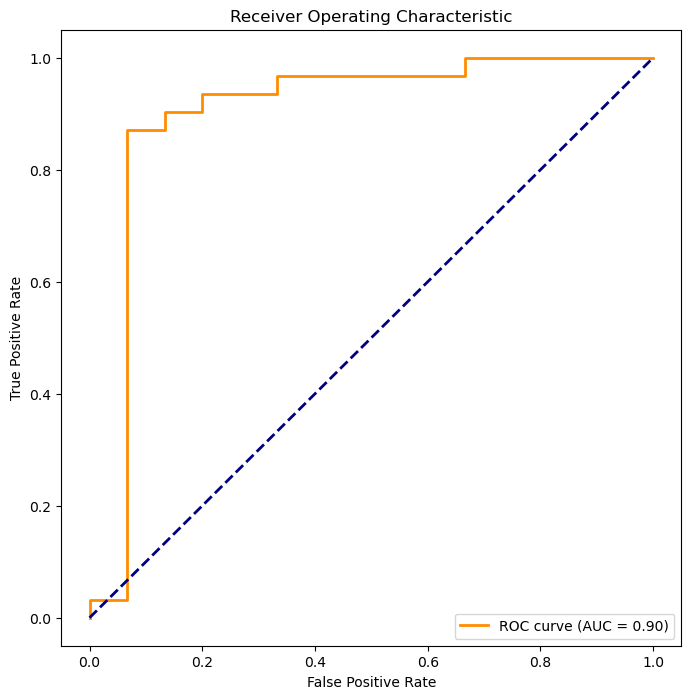

In [56]:
model_ker_pool = Sequential()
model_ker_pool.add(Conv2D(64, (5, 5), activation='relu', input_shape=(128, 128, 3)))
model_ker_pool.add(MaxPooling2D((3, 3)))
model_ker_pool.add(Conv2D(128, (3, 3), activation='relu'))
model_ker_pool.add(MaxPooling2D((2, 2)))
model_ker_pool.add(Flatten())
model_ker_pool.add(Dense(256, activation='relu'))
model_ker_pool.add(Dropout(0.5))
model_ker_pool.add(Dense(2, activation='softmax'))

# Compilar el modelo
model_ker_pool.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_ker_pool.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
evaluate_model(model_ker_pool, X_test, y_test)

#### Modificar la Tasa de Dropout:

Se ha modificado la tasa de Dropout para evaluar cómo afecta al sobreajuste del modelo.

Epoch 1/20
6/6 [==============================] - 2s 231ms/step - loss: 2.8609 - accuracy: 0.5691 - val_loss: 0.5568 - val_accuracy: 0.6739
Epoch 2/20
6/6 [==============================] - 1s 215ms/step - loss: 0.5463 - accuracy: 0.7514 - val_loss: 0.5355 - val_accuracy: 0.7826
Epoch 3/20
6/6 [==============================] - 1s 219ms/step - loss: 0.4343 - accuracy: 0.7956 - val_loss: 0.5986 - val_accuracy: 0.7391
Epoch 4/20
6/6 [==============================] - 1s 204ms/step - loss: 0.3544 - accuracy: 0.8674 - val_loss: 0.4637 - val_accuracy: 0.8043
Epoch 5/20
6/6 [==============================] - 1s 221ms/step - loss: 0.2697 - accuracy: 0.8950 - val_loss: 0.5431 - val_accuracy: 0.8261
Epoch 6/20
6/6 [==============================] - 1s 219ms/step - loss: 0.1668 - accuracy: 0.9503 - val_loss: 0.6995 - val_accuracy: 0.8043
Epoch 7/20
6/6 [==============================] - 1s 224ms/step - loss: 0.1782 - accuracy: 0.9392 - val_loss: 0.4638 - val_accuracy: 0.8696
Epoch 8/20
6/6 [====

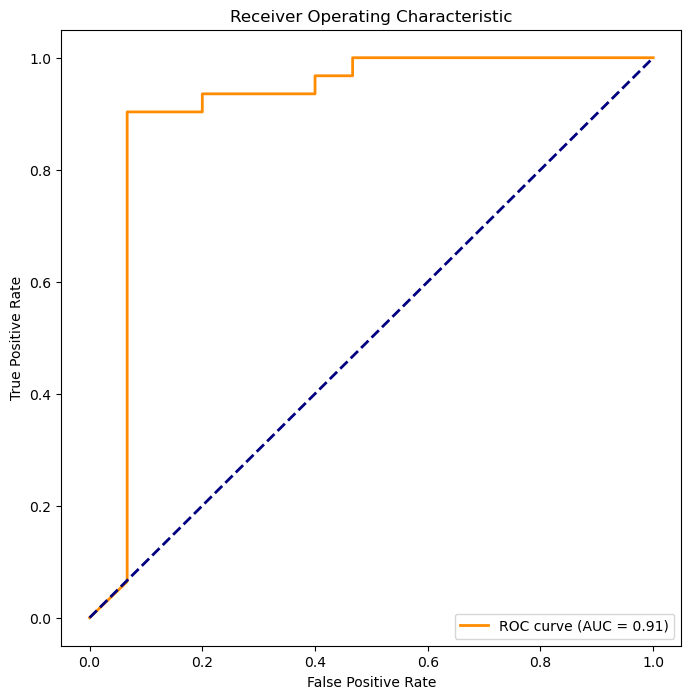

In [57]:
model_drop = Sequential()
model_drop.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_drop.add(MaxPooling2D((2, 2)))
model_drop.add(Conv2D(128, (3, 3), activation='relu'))
model_drop.add(MaxPooling2D((2, 2)))
model_drop.add(Flatten())
model_drop.add(Dense(256, activation='relu'))
model_drop.add(Dropout(0.3))
model_drop.add(Dense(2, activation='softmax'))

# Compilar el modelo
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_drop.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
evaluate_model(model_drop, X_test, y_test)


#### Cambiar la Función de Activación:

Se ha cambiado la función de activación a 'tanh' para evaluar su impacto en el rendimiento del modelo.

Epoch 1/20
6/6 [==============================] - 2s 264ms/step - loss: 1.5313 - accuracy: 0.5470 - val_loss: 0.7655 - val_accuracy: 0.6739
Epoch 2/20
6/6 [==============================] - 1s 231ms/step - loss: 1.0534 - accuracy: 0.5967 - val_loss: 0.5857 - val_accuracy: 0.6522
Epoch 3/20
6/6 [==============================] - 1s 236ms/step - loss: 0.9638 - accuracy: 0.5470 - val_loss: 0.7027 - val_accuracy: 0.4348
Epoch 4/20
6/6 [==============================] - 1s 230ms/step - loss: 0.9850 - accuracy: 0.5635 - val_loss: 0.5714 - val_accuracy: 0.7609
Epoch 5/20
6/6 [==============================] - 1s 241ms/step - loss: 0.8586 - accuracy: 0.6022 - val_loss: 0.5588 - val_accuracy: 0.7609
Epoch 6/20
6/6 [==============================] - 1s 235ms/step - loss: 0.9430 - accuracy: 0.6133 - val_loss: 0.5452 - val_accuracy: 0.8043
Epoch 7/20
6/6 [==============================] - 1s 235ms/step - loss: 0.9688 - accuracy: 0.5525 - val_loss: 0.4560 - val_accuracy: 0.8043
Epoch 8/20
6/6 [====

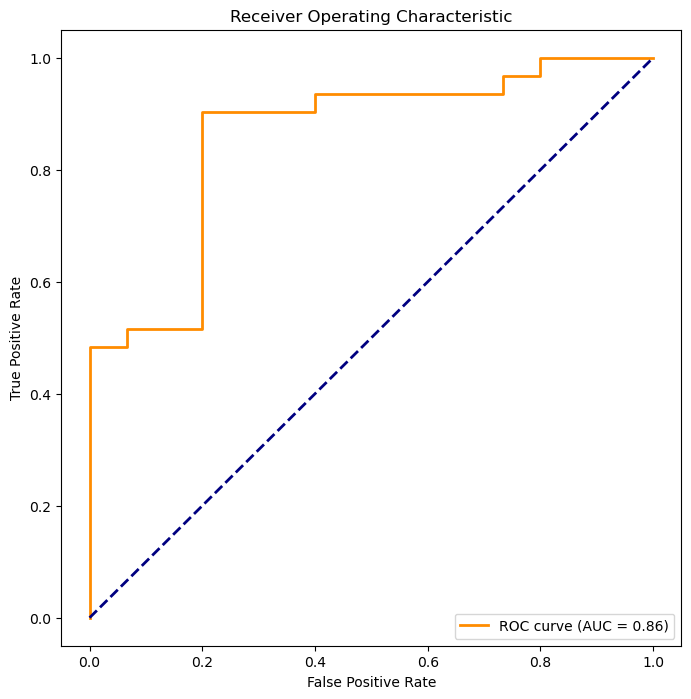

In [58]:
model_act = Sequential()
model_act.add(Conv2D(64, (3, 3), activation='tanh', input_shape=(128, 128, 3)))
model_act.add(MaxPooling2D((2, 2)))
model_act.add(Conv2D(128, (3, 3), activation='tanh'))
model_act.add(MaxPooling2D((2, 2)))
model_act.add(Flatten())
model_act.add(Dense(256, activation='tanh'))
model_act.add(Dropout(0.5))
model_act.add(Dense(2, activation='softmax'))

# Compilar el modelo
model_act.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_act.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
evaluate_model(model_act, X_test, y_test)


#### Tasa de Aprendizaje Personalizada:

Se ha utilizado una tasa de aprendizaje personalizada para evaluar si afecta positivamente al entrenamiento del modelo.

Epoch 1/20
6/6 [==============================] - 2s 271ms/step - loss: 0.8259 - accuracy: 0.4807 - val_loss: 0.5917 - val_accuracy: 0.6739
Epoch 2/20
6/6 [==============================] - 2s 258ms/step - loss: 0.6792 - accuracy: 0.6188 - val_loss: 0.5561 - val_accuracy: 0.7826
Epoch 3/20
6/6 [==============================] - 1s 224ms/step - loss: 0.5649 - accuracy: 0.7735 - val_loss: 0.5326 - val_accuracy: 0.8261
Epoch 4/20
6/6 [==============================] - 1s 237ms/step - loss: 0.5371 - accuracy: 0.7845 - val_loss: 0.5008 - val_accuracy: 0.8261
Epoch 5/20
6/6 [==============================] - 1s 221ms/step - loss: 0.4953 - accuracy: 0.7845 - val_loss: 0.4837 - val_accuracy: 0.7826
Epoch 6/20
6/6 [==============================] - 1s 226ms/step - loss: 0.5027 - accuracy: 0.7735 - val_loss: 0.4720 - val_accuracy: 0.8043
Epoch 7/20
6/6 [==============================] - 1s 221ms/step - loss: 0.4573 - accuracy: 0.8122 - val_loss: 0.4931 - val_accuracy: 0.8261
Epoch 8/20
6/6 [====

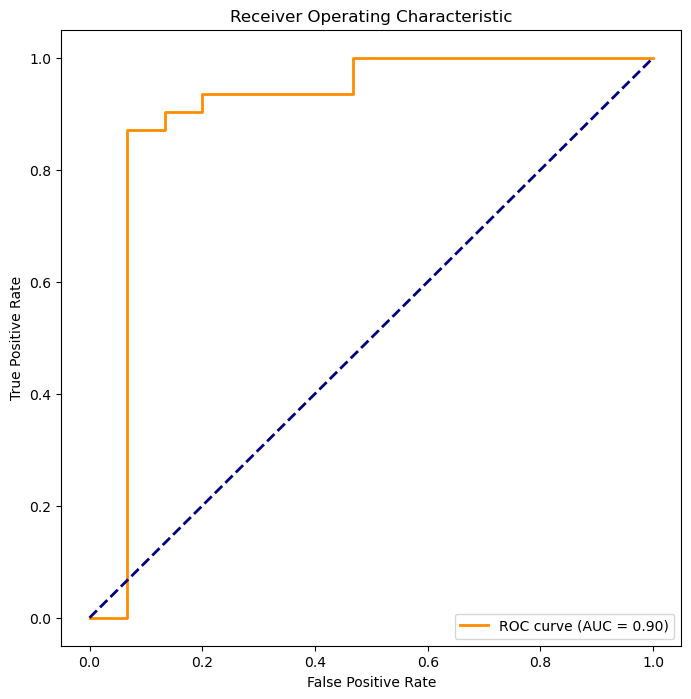

In [59]:
from tensorflow.keras.optimizers import Adam

model_per = Sequential()
model_per.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_per.add(MaxPooling2D((2, 2)))
model_per.add(Conv2D(128, (3, 3), activation='relu'))
model_per.add(MaxPooling2D((2, 2)))
model_per.add(Flatten())
model_per.add(Dense(256, activation='relu'))
model_per.add(Dropout(0.5))
model_per.add(Dense(2, activation='softmax'))

# Compilar el modelo con tasa de aprendizaje personalizada
custom_optimizer = Adam(learning_rate=0.0001)
model_per.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_per.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo 
evaluate_model(model_per, X_test, y_test)

### 5. Resultados

El "Modelo Base" destaca como la opción más sólida, evidenciando un rendimiento superior con la mayor precisión y un equilibrio adecuado entre recall y precisión. La matriz de confusión respalda estos resultados al mostrar una baja incidencia de falsos positivos y falsos negativos. En este contexto específico de detección de tumores cerebrales, el "Modelo Principal", diseñado según la arquitectura y parámetros que proporcionaste, emerge como la elección más prometedora para la clasificación de imágenes. La consideración tanto de la precisión global como de métricas específicas del problema, como el recall, es crucial para una evaluación integral del rendimiento del modelo.

### 6. Pruebas del Modelo

Se utilizo el dataset de https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection para hacer las nuevas predicciones

In [61]:
# Sección para realizar predicciones con nuevas imágenes
new_data_folder = 'archive' """ Cambiar a la ruta de la carpeta que se quiere probar (considera que las imágenes deben estar en carpetas "yes" y "no" 
dentro de la carpeta principal)"""

# Cargar nuevas imágenes
def load_new_images(folder):
    new_images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        new_images.append(img)
    return new_images

# Cargar imágenes de la carpeta "no"
new_no_images = load_new_images(os.path.join(new_data_folder, 'no'))

# Cargar imágenes de la carpeta "yes"
new_yes_images = load_new_images(os.path.join(new_data_folder, 'yes'))

# Convertir a formato de entrada del modelo
new_data = np.array(new_no_images + new_yes_images)

# Realizar predicciones con el Modelo Principal
new_predictions = model.predict(new_data)

# Convertir etiquetas one-hot a etiquetas de clase
true_labels = np.concatenate([np.zeros(len(new_no_images)), np.ones(len(new_yes_images))])

# Obtener predicciones de clases
predicted_labels = np.argmax(new_predictions, axis=1)

# Encuentra los índices de las imágenes clasificadas incorrectamente
incorrect_indices = np.where(true_labels != predicted_labels)[0]

# Número de imágenes clasificadas incorrectamente
num_incorrect = len(incorrect_indices)
print(f'Número de imágenes clasificadas incorrectamente: {num_incorrect}')

# Número total de imágenes clasificadas
total_images = len(new_no_images) + len(new_yes_images)
print(f'Número total de imágenes clasificadas: {total_images}')

# Número total de imágenes
total_images = len(new_data)

# Calcular el porcentaje de error
error_percentage = (num_incorrect / total_images) * 100

print(f'Porcentaje de error en nuevas predicciones: {error_percentage:.2f}%')

# Evaluar métricas adicionales
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, new_predictions[:, 1])

# Imprimir métricas adicionales
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC Score: {roc_auc:.4f}')


94/94 [==============================] - 5s 56ms/step
Número de imágenes clasificadas incorrectamente: 469
Número total de imágenes clasificadas: 3000
Porcentaje de error en nuevas predicciones: 15.63%
Precision: 0.8727
Recall: 0.8047
Confusion Matrix:
[[1324  176]
 [ 293 1207]]
ROC-AUC Score: 0.9041


### 7. Conclusiones

Enfrentamos el desafío de hacer menos invasivo el proceso de obtener información genética de tumores cerebrales. Para ello, nos sumergimos en el mundo de la inteligencia artificial y la visión por computadora. Descubrimos que nuestro modelo principal superó las expectativas, mostrando una precisión sólida y un equilibrio entre aciertos y omisiones.

Al poner a prueba nuestro modelo con nuevas imágenes, notamos un 15.63% de error, pero las métricas clave como precisión y recall se mantuvieron robustas. El camino futuro implica ajustar aún más la técnica y explorar otras arquitecturas avanzadas. Aunque hemos avanzado significativamente, reconocemos la importancia de seguir evolucionando y adaptándonos a los desafíos médicos en constante cambio. Este proyecto destaca cómo la inteligencia artificial puede marcar la diferencia en la medicina, ofreciendo soluciones innovadoras que prometen un futuro más saludable.